# 🌪️ **Wind Turbine Data Analysis & Time Series Forecasting with RNN**  

📌 **Author:** Ahmed Fathy Gwely  
📅 **Date:** March 13, 2025  
🔢 **Version:** 1.0  

---

#### 📖 **Overview**  

Wind energy plays a crucial role in the global shift toward sustainable power generation. This notebook presents a comprehensive analysis of wind turbine performance using **machine learning and deep learning techniques**, with a primary focus on **Recurrent Neural Networks (RNNs)** for time series forecasting.  

By leveraging **historical SCADA data**, we aim to develop accurate predictive models that enhance turbine efficiency, optimize energy output, and enable proactive maintenance strategies.  

---

#### 🎯 **Objectives**  

✅ Perform **data preprocessing** to clean and structure the dataset.  
✅ Conduct **exploratory data analysis (EDA)** to identify trends and relationships.  
✅ Engineer **meaningful features** to improve model performance.  
✅ Implement **machine learning models** as a baseline.  
✅ Develop **RNN-based deep learning models** for time series forecasting.  
✅ Evaluate models using appropriate **performance metrics**.  
✅ Visualize key **insights and predictions** through professional plots.  

---

#### 📂 **Dataset Description**  

- **Source:** Wind Turbine SCADA Dataset  
- **Data Type:** Time-series  
- **Key Features:**  
  - 📅 `Date/Time`: Timestamp of each observation  
  - 🌬️ `Wind Speed (m/s)`: Measured wind speed  
  - ⚡ `Power (kW)`: Actual power output of the turbine  
  - 🔄 `Theoretical Power Curve (kW)`: Expected power output based on wind speed  
  - 🧭 `Wind Direction (°)`: Direction from which the wind is blowing  
- **Target Variable:** `Power (kW)`  

---

#### 🏗 **Notebook Workflow**  

📌 **Step 1: Data Loading & Preprocessing**  
- Import the dataset  
- Handle missing values and inconsistencies  
- Normalize and scale data for model compatibility  

📌 **Step 2: Exploratory Data Analysis (EDA)**  
- Visualize trends and correlations  
- Identify patterns in power generation and wind speed  
- Detect anomalies and outliers  

📌 **Step 3: Feature Engineering**  
- Generate time-based features  
- Implement lag-based and rolling window transformations  

📌 **Step 4: Model Development**  
- Train baseline machine learning models (e.g., Linear Regression, Random Forest)  
- Implement **Recurrent Neural Networks (RNNs)** for time series forecasting  
- Optimize hyperparameters for better performance  

📌 **Step 5: Model Evaluation**  
- Compare models using metrics such as:  
  - **R² Score** (Coefficient of Determination)  
  - **Mean Absolute Error (MAE)**  
  - **Mean Squared Error (MSE)**  
- Perform inverse transformation for real-world interpretation  

📌 **Step 6: Results & Visualization**  
- Generate **professional plots** comparing true vs. predicted values  
- Highlight key takeaways and actionable insights  

📌 **Step 7: Conclusion & Future Work**  
- Summarize findings  
- Discuss potential improvements and next steps  

---

### 🔧 **Requirements & Dependencies**  

Ensure the following libraries are installed before running the notebook:  

```bash
pip install numpy pandas matplotlib seaborn scikit-learn tensorflow keras


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
dataset = pd.read_csv('data/T1.csv')
dataset.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [4]:
dataset.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [5]:
#dataset['Date/Time'] is object 
dataset['Date/Time'] = pd.to_datetime(dataset['Date/Time'], format='%d %m %Y %H:%M')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date/Time                      50530 non-null  datetime64[ns]
 1   LV ActivePower (kW)            50530 non-null  float64       
 2   Wind Speed (m/s)               50530 non-null  float64       
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64       
 4   Wind Direction (°)             50530 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


In [7]:
dataset.describe()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530,50530.000000,50530.000000,50530.000000,50530.000000
mean,2018-07-01 20:01:30.065307648,1307.684332,7.557952,1492.175463,123.687559
min,2018-01-01 00:00:00,-2.471405,0.000000,0.000000,0.000000
25%,2018-04-03 05:22:30,50.677890,4.201395,161.328167,49.315437
50%,2018-06-30 16:15:00,825.838074,7.104594,1063.776283,73.712978
75%,2018-09-26 18:57:30,2482.507568,10.300020,2964.972462,201.696720
max,2018-12-31 23:50:00,3618.732910,25.206011,3600.000000,359.997589
std,NaN,1312.459242,4.227166,1368.018238,93.443736


## replace negative values with mean


In [8]:
dataset.loc[dataset['LV ActivePower (kW)'] < 0, 'LV ActivePower (kW)'] = 1307.684332
dataset.describe()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530,50530.000000,50530.000000,50530.000000,50530.000000
mean,2018-07-01 20:01:30.065307648,1309.159823,7.557952,1492.175463,123.687559
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2018-04-03 05:22:30,53.204888,4.201395,161.328167,49.315437
50%,2018-06-30 16:15:00,829.766357,7.104594,1063.776283,73.712978
75%,2018-09-26 18:57:30,2482.507568,10.300020,2964.972462,201.696720
max,2018-12-31 23:50:00,3618.732910,25.206011,3600.000000,359.997589
std,NaN,1311.722947,4.227166,1368.018238,93.443736


# min in LV columns >>>> -2.471405

# In Active power LV Describe() min value is negative that is mean that wind turbine sometimes is consuming power rather than generating it .

## This situation can occur under several conditions:

1- Start-Up Phase: During the initial start-up phase, the turbine may draw power from the grid to initiate the rotation of the blades until the wind speed is sufficient for self-sustained operation.

2- Low Wind Conditions: When wind speeds are too low to generate sufficient power, the turbine may consume power to maintain its systems and control mechanisms.

3- Maintenance or Shutdown: During maintenance or shutdown periods, the turbine might use power for essential operations like braking systems, yaw control, and monitoring equipment.

4- Grid Support: In some cases, wind turbines can provide ancillary services to the grid, such as reactive power support or voltage regulation, which might involve consuming power temporarily.

Negative values in active power readings are a normal part of wind turbine operation under certain conditions and help operators understand the turbine's behavior and energy balance.

In [9]:
dataset.isna().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [10]:
df = dataset.copy()

In [11]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [12]:
df.tail()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913
50529,2018-12-31 23:50:00,2820.466064,9.979332,2779.184096,82.274620


In [13]:
df['Month'] = df['Date/Time'].dt.month
df['week'] = df['Date/Time'].dt.isocalendar().week
df['day'] = df['Date/Time'].dt.day
df.head(20)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,week,day
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,1
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,1
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,1
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,1
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,1
5,2018-01-01 00:50:00,402.391998,5.604052,499.436385,264.578613,1,1,1
6,2018-01-01 01:00:00,447.605713,5.793008,557.372363,266.163605,1,1,1
7,2018-01-01 01:10:00,387.242188,5.306050,414.898179,257.949493,1,1,1
8,2018-01-01 01:20:00,463.651215,5.584629,493.677652,253.480698,1,1,1
9,2018-01-01 01:30:00,439.725708,5.523228,475.706783,258.723785,1,1,1


In [14]:
df['Hour']=df['Date/Time'].dt.hour
df.head(100)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,week,day,Hour
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,1,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,1,0
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,1,0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,1,0
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,1,0
...,...,...,...,...,...,...,...,...,...
95,2018-01-01 15:50:00,2820.512939,10.772420,3186.029883,225.276398,1,1,1,15
96,2018-01-01 16:00:00,2812.279053,10.647520,3133.259224,224.680603,1,1,1,16
97,2018-01-01 16:10:00,2530.447021,9.982661,2781.274041,225.519501,1,1,1,16
98,2018-01-01 16:20:00,2399.121094,9.874386,2711.492458,227.273804,1,1,1,16


In [15]:
seasons_dict = {1: 'Winter', 2: 'Winter', 3: 'Winter', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}

df['Seasons'] = df['Month'].map(seasons_dict)
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,week,day,Hour,Seasons
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,1,0,Winter
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,1,0,Winter
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,1,0,Winter
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,1,0,Winter
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,1,0,Winter
...,...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,12,1,31,23,Winter
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,12,1,31,23,Winter
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,12,1,31,23,Winter
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,12,1,31,23,Winter


In [16]:

df.columns

Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)', 'Month', 'week',
       'day', 'Hour', 'Seasons'],
      dtype='object')

In [17]:
columns_needed = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)','Wind Direction (°)']


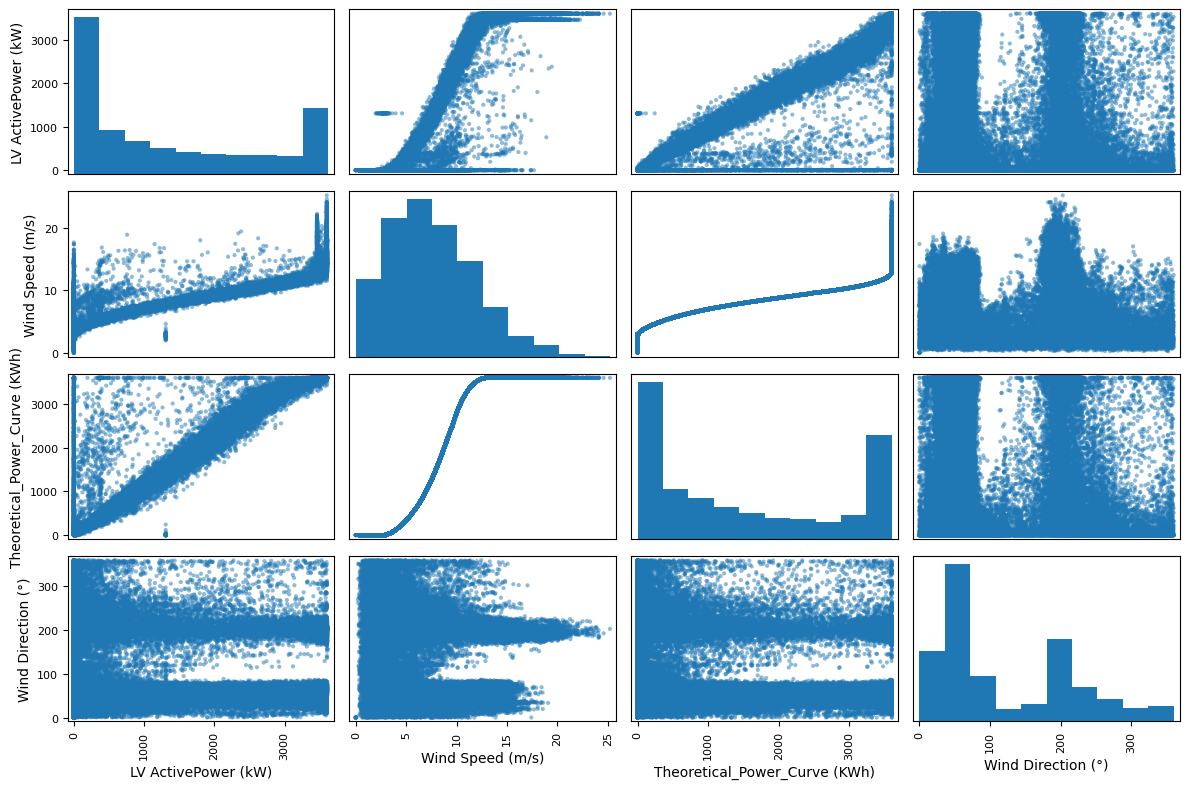

In [18]:
pd.plotting.scatter_matrix(df[columns_needed], figsize=(12, 8))
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'LV ActivePower (kW)'}>,
        <Axes: title={'center': 'Wind Speed (m/s)'}>],
       [<Axes: title={'center': 'Theoretical_Power_Curve (KWh)'}>,
        <Axes: title={'center': 'Wind Direction (°)'}>]], dtype=object)

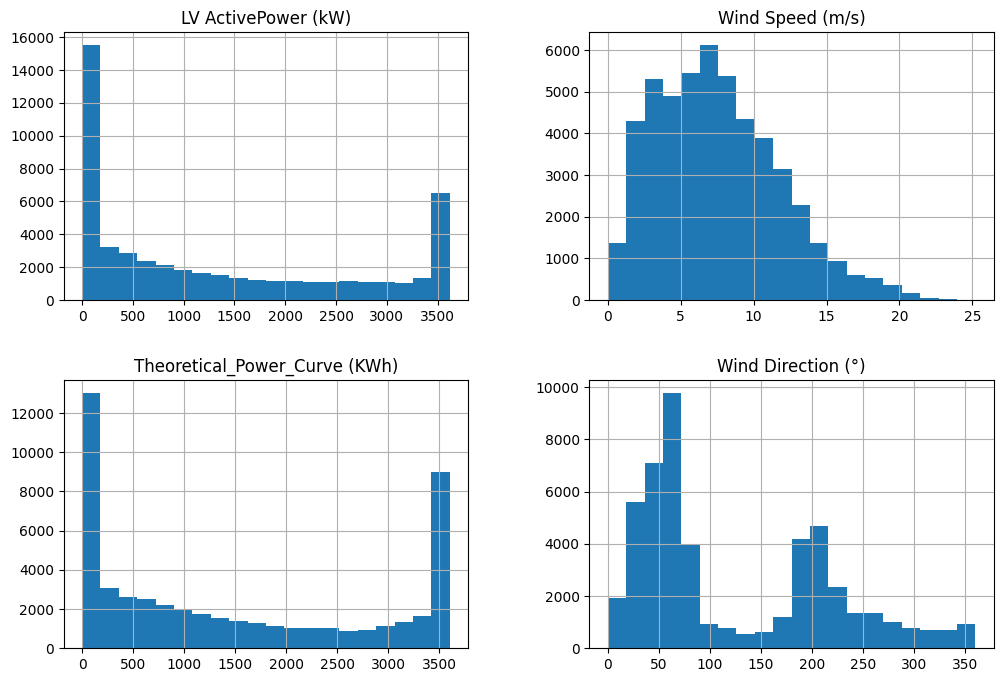

In [19]:
df[columns_needed].hist(bins=20, figsize=(12,8))


In [20]:
df.drop(columns=['Date/Time'], inplace=True)
df

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,week,day,Hour,Seasons
0,380.047791,5.311336,416.328908,259.994904,1,1,1,0,Winter
1,453.769196,5.672167,519.917511,268.641113,1,1,1,0,Winter
2,306.376587,5.216037,390.900016,272.564789,1,1,1,0,Winter
3,419.645905,5.659674,516.127569,271.258087,1,1,1,0,Winter
4,380.650696,5.577941,491.702972,265.674286,1,1,1,0,Winter
...,...,...,...,...,...,...,...,...,...
50525,2963.980957,11.404030,3397.190793,80.502724,12,1,31,23,Winter
50526,1684.353027,7.332648,1173.055771,84.062599,12,1,31,23,Winter
50527,2201.106934,8.435358,1788.284755,84.742500,12,1,31,23,Winter
50528,2515.694092,9.421366,2418.382503,84.297913,12,1,31,23,Winter


In [21]:
numeric_columns = df.select_dtypes(include=['number']).columns
print(numeric_columns)


Index(['LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)', 'Month', 'week',
       'day', 'Hour'],
      dtype='object')


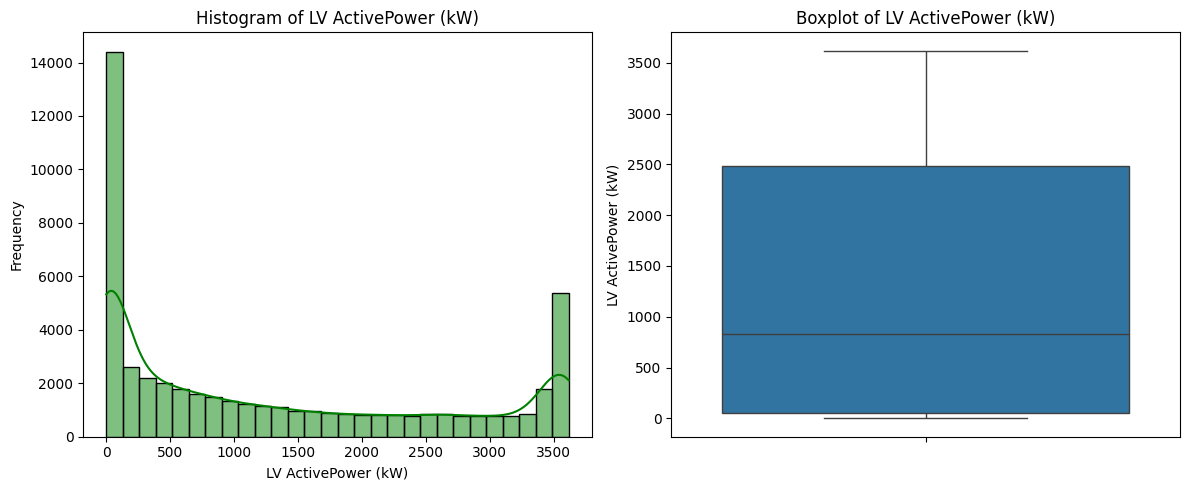

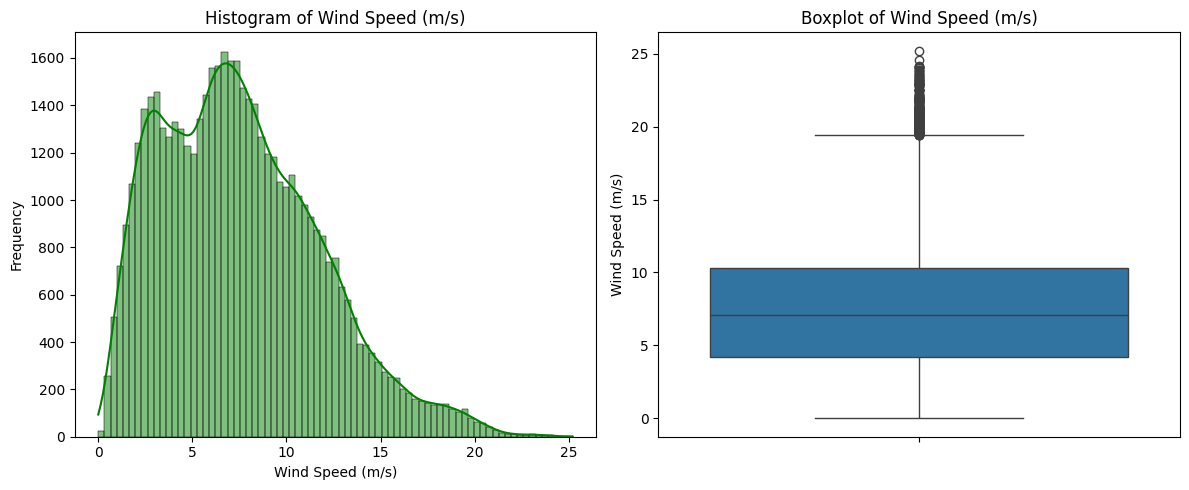

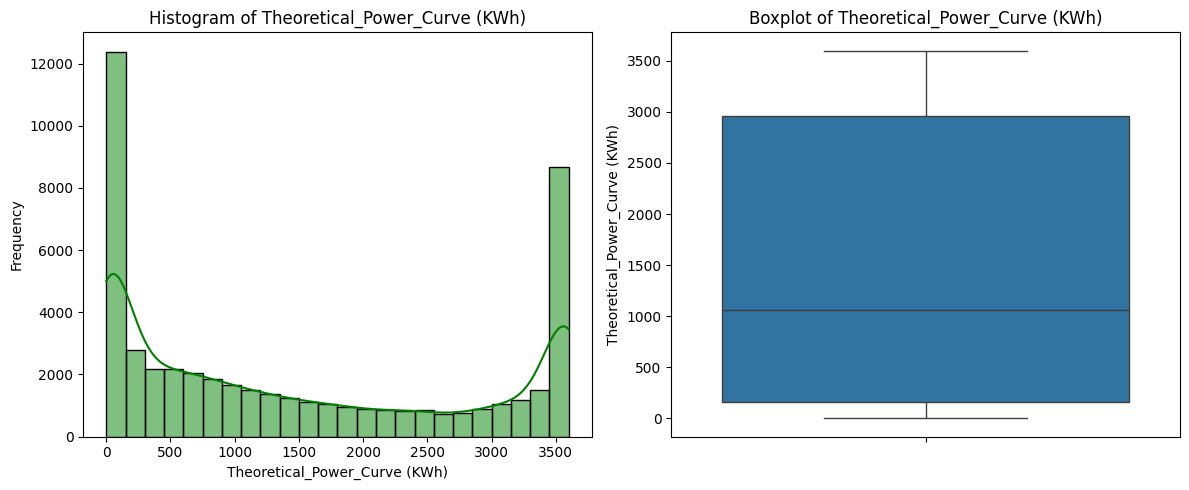

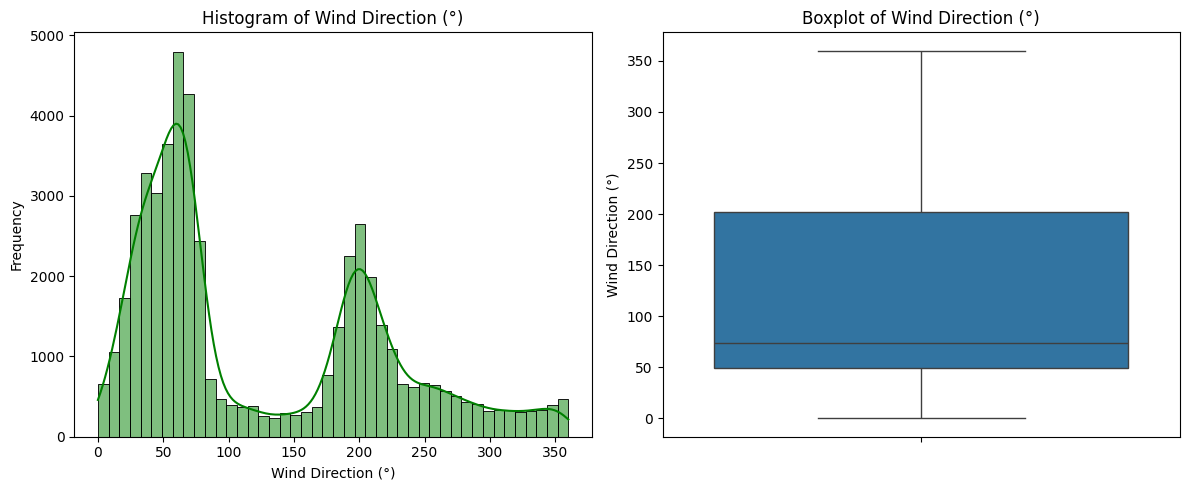

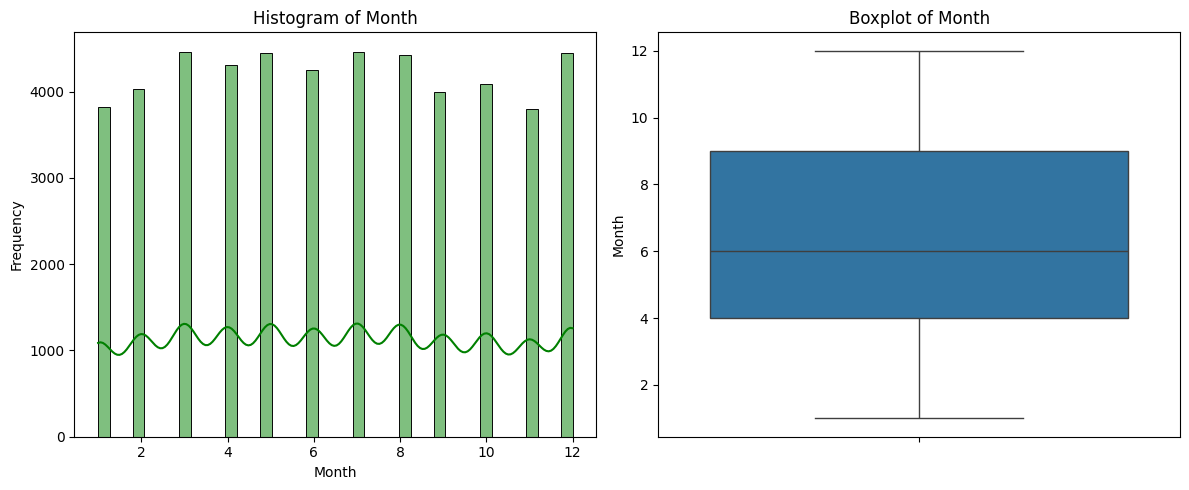

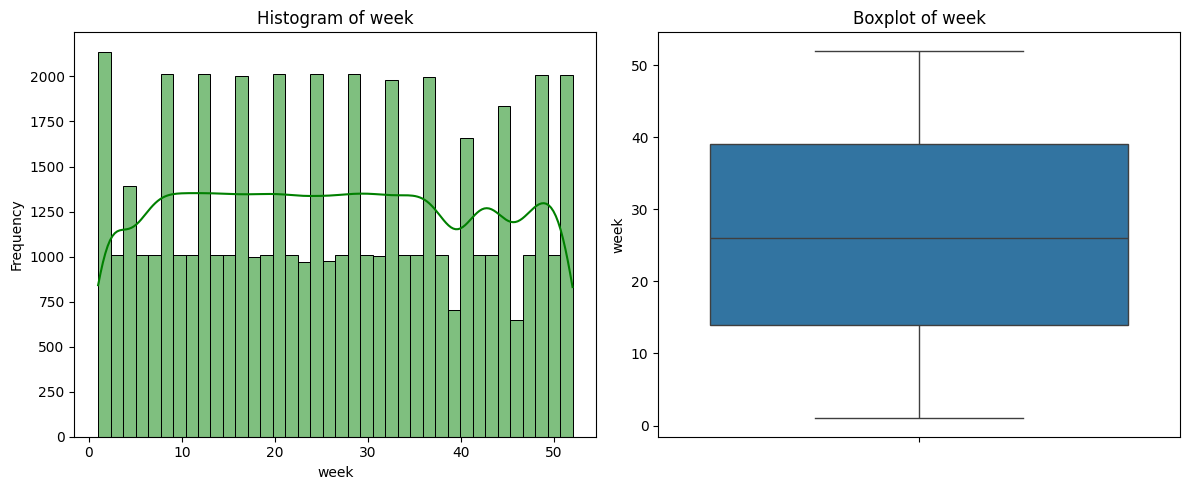

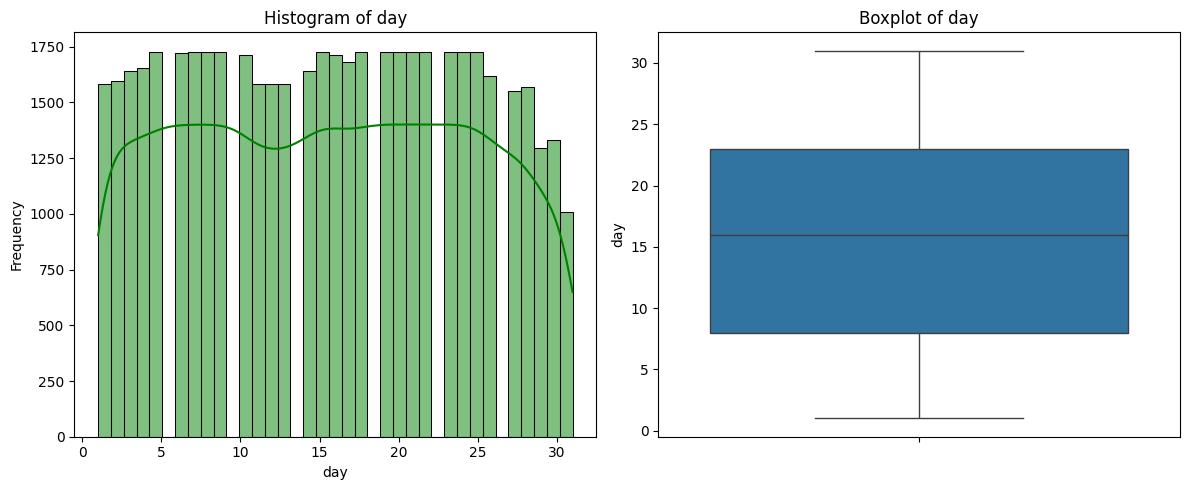

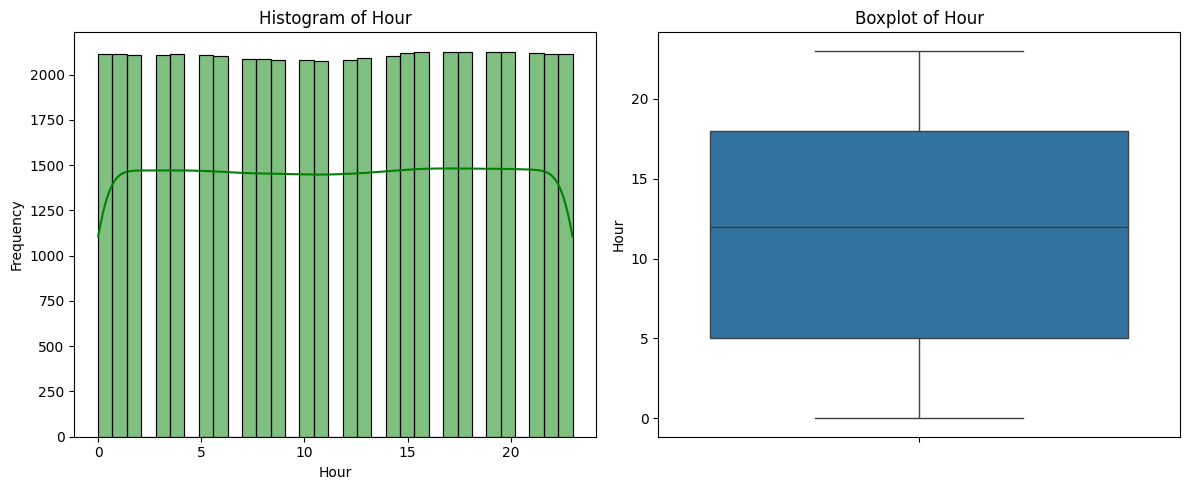

In [22]:
# Plot histograms and boxplots for numeric columns only
# Get only numeric columns to avoid plotting errors
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Check if we have numeric columns to plot
if len(numeric_columns) == 0:
    print("No numeric columns found for plotting!")
else:
    # Plot each numeric column
    for col in numeric_columns:
        try:
            # Create figure with two subplots
            fig, ax = plt.subplots(1, 2, figsize=(12, 5))
            
            # Plot histogram with KDE
            sns.histplot(df[col], ax=ax[0], color='green', kde=True)
            ax[0].set_title(f'Histogram of {col}')
            ax[0].set_xlabel(col)
            ax[0].set_ylabel('Frequency')
            
            # Plot boxplot
            sns.boxplot(y=df[col], ax=ax[1])  # Changed from x to y for better readability
            ax[1].set_title(f'Boxplot of {col}')
            ax[1].set_ylabel(col)
            
            # Adjust layout and show plot
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"Error plotting column '{col}': {str(e)}")
            continue

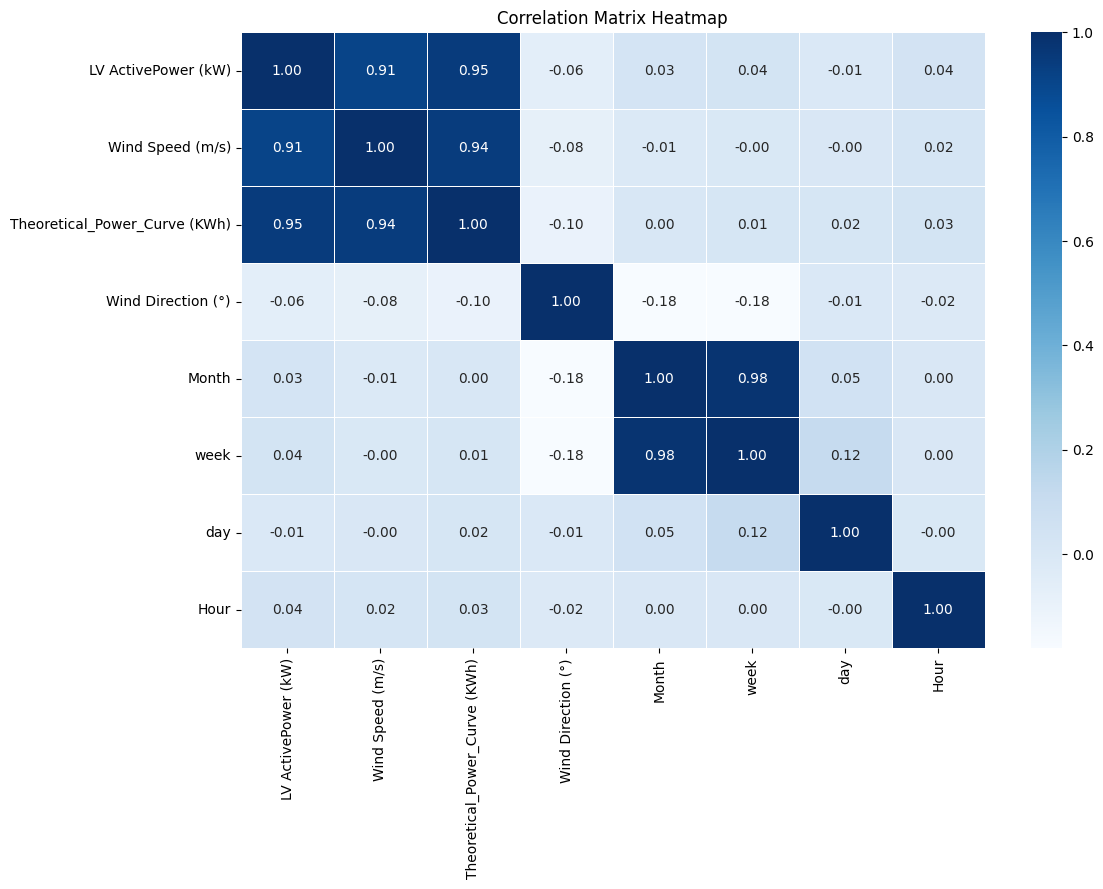

In [23]:
corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_test

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,week,day,Hour,Seasons
8057,3348.910889,11.632760,3452.918718,188.499802,3,9,2,10,Winter
8059,2647.506104,10.345970,2989.120313,190.715607,3,9,2,11,Winter
50250,0.000000,6.430618,779.117347,29.279140,12,52,30,1,Winter
14774,1334.573975,7.952174,1502.728868,49.509399,4,16,18,4,Spring
49374,533.002808,5.906481,593.890170,278.626190,12,51,23,23,Winter
...,...,...,...,...,...,...,...,...,...
20904,1241.927002,7.807554,1421.792289,49.330021,5,22,30,21,Spring
17208,0.000000,3.097670,19.888598,340.675690,5,18,5,4,Spring
43820,0.000000,3.144423,22.290177,156.084900,11,46,15,6,Autumn
43653,961.278687,7.113429,1067.878448,65.963547,11,45,10,12,Autumn


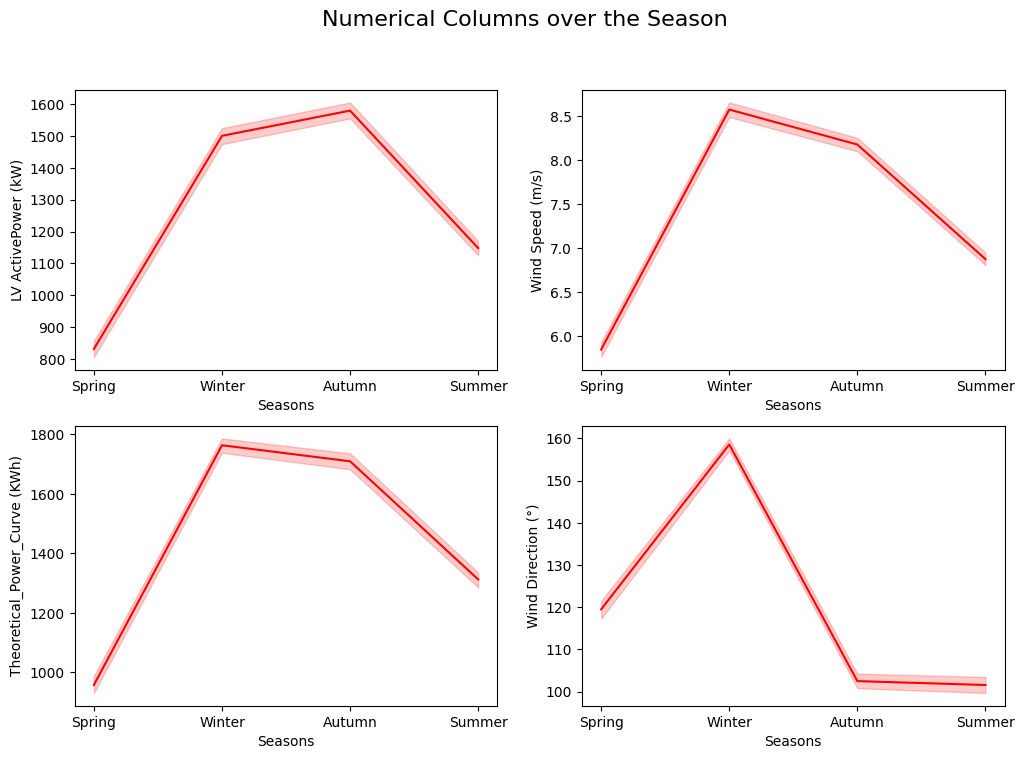

In [25]:
fig,axes=plt.subplots(nrows=2 ,ncols=2,figsize=(12,8))
for idx,col in enumerate(df_train[columns_needed]):
    row_idx=idx//2
    col_idx=idx%2
    sns.lineplot(x='Seasons',y=df_train[col],data=df_train,ax=axes[row_idx,col_idx],color='red')
fig.suptitle('Numerical Columns over the Season', fontsize=16)
plt.show() 

In [26]:
for idx,col in enumerate(df_train[columns_needed]):
    row_idx=idx//2
    col_idx=idx%2
    print(f"row_indx === {row_idx} >>>> col =={col_idx}")

row_indx === 0 >>>> col ==0
row_indx === 0 >>>> col ==1
row_indx === 1 >>>> col ==0
row_indx === 1 >>>> col ==1


In [27]:
df.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,week,day,Hour,Seasons
0,380.047791,5.311336,416.328908,259.994904,1,1,1,0,Winter
1,453.769196,5.672167,519.917511,268.641113,1,1,1,0,Winter
2,306.376587,5.216037,390.900016,272.564789,1,1,1,0,Winter
3,419.645905,5.659674,516.127569,271.258087,1,1,1,0,Winter
4,380.650696,5.577941,491.702972,265.674286,1,1,1,0,Winter


In [28]:
seasons_dict = {1: 'Winter', 2: 'Winter', 3: 'Winter', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}



In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


In [30]:
columns = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)','Wind Direction (°)']
df_train['Seasons'] = pd.Categorical(df_train['Seasons']).codes
df_test['Seasons'] = pd.Categorical(df_test['Seasons'], categories=df_train['Seasons'].unique()).codes


# Define the features (X) and the target (y)
X_train = df_train.drop(columns='LV ActivePower (kW)')
y_train = df_train['LV ActivePower (kW)']
X_test = df_test.drop(columns='LV ActivePower (kW)')
y_test = df_test['LV ActivePower (kW)']

print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(40424, 8)
(40424,)
(10106,)


In [31]:
df_train['Seasons']

13791    1
46267    3
42105    0
21123    2
11823    3
        ..
11284    3
44732    0
38158    0
860      3
15795    1
Name: Seasons, Length: 40424, dtype: int8

In [32]:
y_train

13791       0.000000
46267     292.170105
42105    3387.934082
21123    1082.370972
11823     550.262329
            ...     
11284     174.043304
44732    1118.703003
38158    1925.878052
860      3583.790039
15795       0.000000
Name: LV ActivePower (kW), Length: 40424, dtype: float64

In [33]:
# Standardize the features and normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-1.12525318, -1.09166059,  0.60054166, ..., -0.53397435,
        -0.80091711, -0.59037883],
       [-0.61467742, -0.85285238, -0.00729909, ..., -1.56918366,
        -0.80091711,  1.12847844],
       [ 1.22017524,  1.53196842,  0.93769768, ...,  1.65146752,
         0.92850768, -1.44980746],
       ...,
       [ 0.36873176,  0.53622475, -0.64320608, ...,  1.421421  ,
         0.35203275, -1.44980746],
       [ 1.12157324,  1.51056798,  0.88162859, ..., -0.99406738,
        -1.37739204,  1.12847844],
       [-1.41008267, -1.09166059, -0.9936669 , ...,  1.07635123,
        -0.65679838, -0.59037883]])

In [34]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(40424, 8)
(10106, 8)


## Define models


In [35]:
linear_model = LinearRegression()


In [36]:
linear_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:

linear_model.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
y_pred = linear_model.predict(X_test)


In [39]:
# 📌 Calculate Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Evaluation Metrics for Regression

### 1. R² Score (Coefficient of Determination)
$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$
- \( y_i \) = Actual values  
- \( \hat{y}_i \) = Predicted values  
- \( \bar{y} \) = Mean of actual values  

### 2. RMSE (Root Mean Square Error)
$$
RMSE = \sqrt{\frac{1}{n} \sum (y_i - \hat{y}_i)^2}
$$

### 3. MAE (Mean Absolute Error)
$$
MAE = \frac{1}{n} \sum |y_i - \hat{y}_i|
$$

Where:
- \( n \) is the total number of observations.


In [40]:
print(f"Linear Regression Performance:\nR² Score: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")


Linear Regression Performance:
R² Score: 0.891, MAE: 205.048, RMSE: 430.808


## 📊 Key Differences Between R², RMSE, and MAE

| **Metric** | **Meaning** | **Sensitivity to Outliers** | **Scale** |
|------------|------------|----------------------------|-----------|
| **R²**     | Measures how well the model explains variance | Moderate | 0 to 1 (higher is better) |
| **RMSE**   | Standard deviation of errors | High (squares errors) | Same as target variable |
| **MAE**    | Average absolute error | Low | Same as target variable |

### 🔹 **RMSE vs. MAE**
- **RMSE** penalizes large errors more, making it useful when big mistakes matter.
- **MAE** treats all errors equally, making it more interpretable.

### 🔹 **R² vs. RMSE/MAE**
- **R²** tells you how well the model fits but doesn’t show actual error magnitudes.
- **RMSE and MAE** provide real error values in the same unit as the target variable.

## 🚀 **Which One to Use?**
✅ **Use R²** if you want to measure how well the model explains variability.  
✅ **Use RMSE** if you care about large errors.  
✅ **Use MAE** if you want a simple, interpretable error measure.  


##   Scatter Plot: Actual vs. Predicted Values


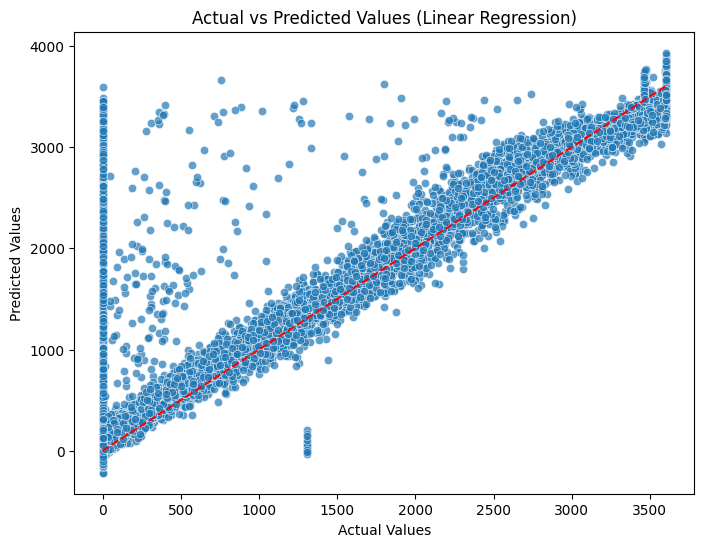

In [41]:
#  Scatter Plot: Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.show()

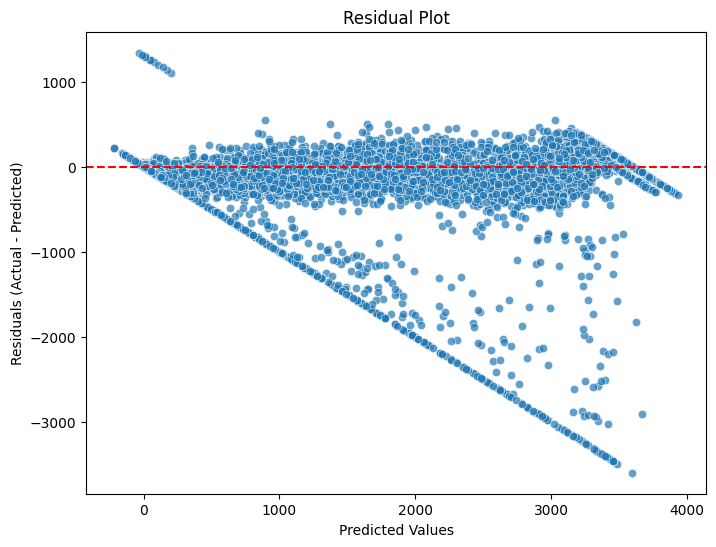

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Create residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--")  # Zero error reference line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


In [43]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Support Vector Regression": SVR()
}

In [44]:
# Train & evaluate models
results = {}
model_scores = {}

for name, model in models.items():
    # Use scaled data for SVR, unscaled for others
    if name == "Support Vector Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    #  Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    model_scores[name] = r2

    
    results[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}

# Print results
results_df = pd.DataFrame(results).T
print(results_df)

                                  MAE        RMSE  R2 Score
Linear Regression          205.047554  430.808169  0.891082
Decision Tree              104.666687  306.078770  0.945021
Random Forest               86.444317  220.296706  0.971519
Gradient Boosting          130.643615  301.401248  0.946688
Support Vector Regression  541.657696  694.222695  0.717167


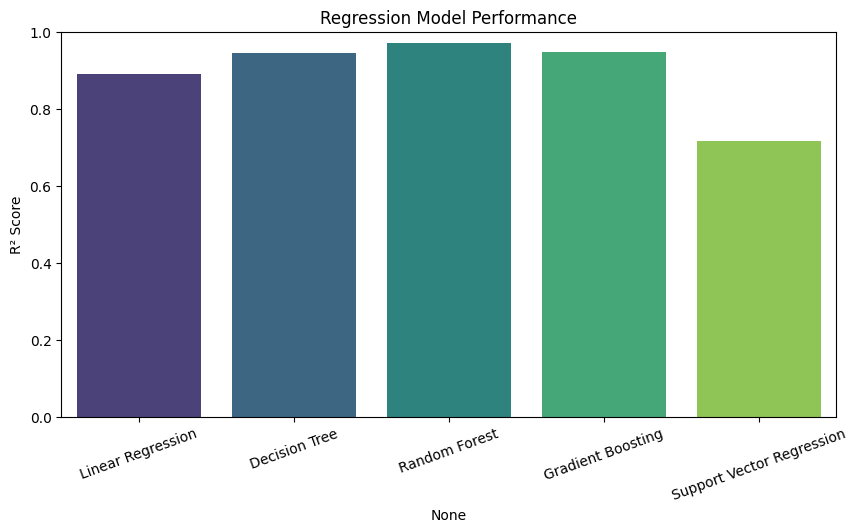

In [45]:

scores_df = pd.DataFrame(model_scores.values(), index=model_scores.keys(), columns=['R² Score'])

# Plot the accuracy
plt.figure(figsize=(10, 5))
sns.barplot(x=scores_df.index, y=scores_df['R² Score'], palette="viridis")
plt.ylabel("R² Score")
plt.title("Regression Model Performance")
plt.ylim(0, 1)  # R² ranges between -∞ to 1, but typically [0,1] for good models
plt.xticks(rotation=20)
plt.show()


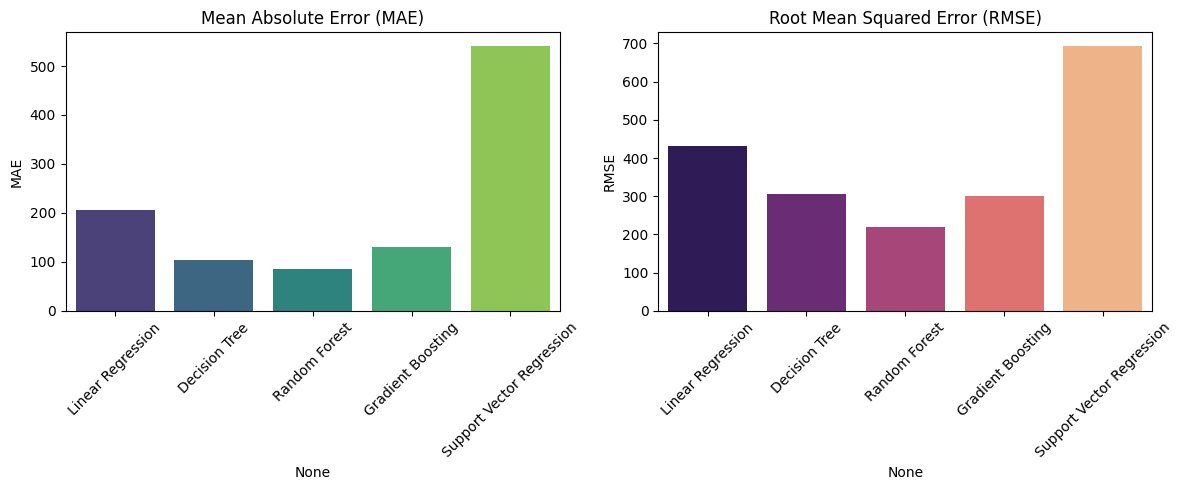

In [46]:
# 2. Bar Plot: MAE & RMSE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=results_df.index, y=results_df["MAE"], palette="viridis", ax=ax[0])
ax[0].set_title("Mean Absolute Error (MAE)")
ax[0].set_xticklabels(results_df.index, rotation=45)
ax[0].set_ylabel("MAE")

sns.barplot(x=results_df.index, y=results_df["RMSE"], palette="magma", ax=ax[1])
ax[1].set_title("Root Mean Squared Error (RMSE)")
ax[1].set_xticklabels(results_df.index, rotation=45)
ax[1].set_ylabel("RMSE")

plt.tight_layout()
plt.show()

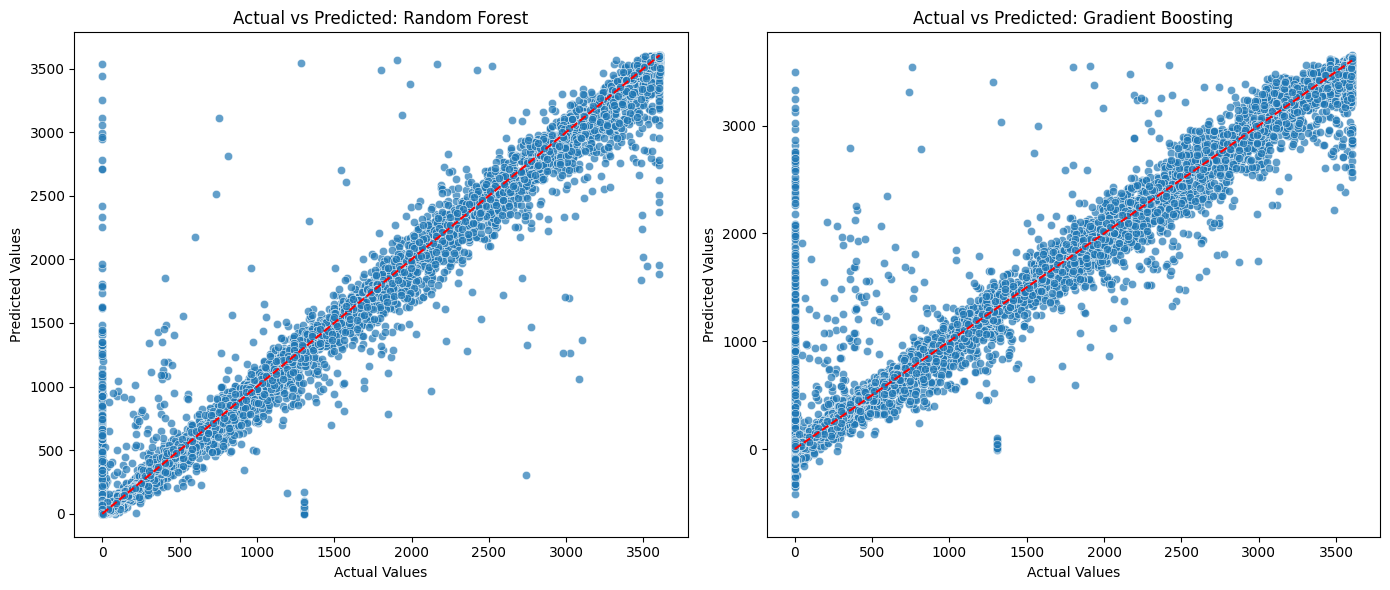

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Sort models by R² Score (descending order)
best_models = results_df.sort_values("R2 Score", ascending=False).head(2).index.tolist()

# 📌 Plot actual vs. predicted values for the best two models
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

for i, model_name in enumerate(best_models):
    # Predict values
    if model_name == "Support Vector Regression":
        y_pred = models[model_name].predict(X_test_scaled)
    else:
        y_pred = models[model_name].predict(X_test)
    
    # Scatter plot
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, ax=ax[i])
    ax[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Perfect prediction line
    ax[i].set_xlabel("Actual Values")
    ax[i].set_ylabel("Predicted Values")
    ax[i].set_title(f"Actual vs Predicted: {model_name}")

plt.tight_layout()
plt.show()


# Deep Learning

# RNN

In [48]:
dataset = pd.read_csv('data/T1.csv')
dataset.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [49]:
dataset['Date/Time'] = pd.to_datetime(dataset['Date/Time'], format="%d %m %Y %H:%M", errors='coerce')


In [50]:
dataset['Date/Time'] = pd.to_datetime(dataset['Date/Time'], format="%d %m %Y %H:%M", errors='coerce')
dataset.set_index('Date/Time', inplace=True)
features = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Wind Direction (°)']  # Select relevant features
dataset = dataset[features].dropna()

In [51]:
dataset.head()

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°)
Date/Time,,,
2018-01-01 00:00:00,380.047791,5.311336,259.994904
2018-01-01 00:10:00,453.769196,5.672167,268.641113
2018-01-01 00:20:00,306.376587,5.216037,272.564789
2018-01-01 00:30:00,419.645905,5.659674,271.258087
2018-01-01 00:40:00,380.650696,5.577941,265.674286


In [52]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

## Convert DataFrame to NumPy array


In [53]:
data = dataset.values  
data

array([[ 380.04779053,    5.31133604,  259.99490356],
       [ 453.76919556,    5.67216682,  268.64111328],
       [ 306.37658691,    5.2160368 ,  272.56478882],
       ...,
       [2201.10693359,    8.43535805,   84.74250031],
       [2515.6940918 ,    9.42136574,   84.2979126 ],
       [2820.46606445,    9.97933197,   82.27462006]])

In [54]:
# Split data into Training (80%) and Testing (20%) **before scaling**
train_size = int(0.8 * len(data))
test_size = len(data) - train_size
train_data, test_data = data[:train_size], data[train_size:]

## MinMaxScaler

In [55]:
# Create MinMaxScaler and fit only on training data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)  #  Fit only on training
test_data_scaled = scaler.transform(test_data)  # Transform only on test set

##  Further split val

In [56]:
# Further split training data into Training (90%) and Validation (10%)
val_size = int(0.1 * len(train_data_scaled))  # 10% of training for validation
train_data_final, val_data = train_data_scaled[:-val_size], train_data_scaled[-val_size:]


# Create sequences


In [57]:
# Create sequences
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, 0])  # Assuming the first feature is the target
    return np.array(X), np.array(y)

time_step = 10  # You can adjust this value

X_train, y_train = create_sequences(train_data_final, time_step)
X_val, y_val = create_sequences(val_data, time_step)
X_test, y_test = create_sequences(test_data_scaled, time_step)



> ## Shape: (samples, time_steps, features)
> ## y is the next step prediction

In [58]:
print(f'X_train >>> {X_train.shape} ---- y_train >> {y_train.shape}')
print(f'X_val >>> {X_val.shape} ----- y_val >> {y_val.shape}')
print(f'X_test >>> {X_test.shape} ----- y_test >> {y_test.shape}')

X_train >>> (36372, 10, 3) ---- y_train >> (36372,)
X_val >>> (4032, 10, 3) ----- y_val >> (4032,)
X_test >>> (10096, 10, 3) ----- y_test >> (10096,)


In [59]:
print(train_data_final.shape, val_data.shape, test_data_scaled.shape)


(36382, 3) (4042, 3) (10106, 3)


In [60]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


(36372, 10, 3) (36372,)
(4032, 10, 3) (4032,)
(10096, 10, 3) (10096,)


## RNN NN

In [61]:
# Define the RNN model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(10, 3)),  # First LSTM layer
    LSTM(50, return_sequences=False),  # Second LSTM layer
    Dense(25, activation='relu'),  # Dense hidden layer
    Dense(1)  # Output layer (regression)
])
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [62]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,301 (126.18 KB)

 Trainable params: 32,301 (126.18 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0089 - mae: 0.0555 - val_loss: 0.0055 - val_mae: 0.0493
Epoch 2/10
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0049 - mae: 0.0405 - val_loss: 0.0054 - val_mae: 0.0490
Epoch 3/10
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0047 - mae: 0.0392 - val_loss: 0.0054 - val_mae: 0.0469
Epoch 4/10
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0046 - mae: 0.0381 - val_loss: 0.0052 - val_mae: 0.0465
Epoch 5/10
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0046 - mae: 0.0380 - val_loss: 0.0053 - val_mae: 0.0468
Epoch 6/10
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0047 - mae: 0.0384 - val_loss: 0.0053 - val_mae: 0.0470
Epoch 7/10
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0046 - mae: 0.0374 - val_loss: 0.0064 - val_mae: 0.0572
Epoch 8/10
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0046 - mae: 0.0376 - val_loss: 0.0056 - val_mae: 0.0483
Epoch 9/10
1137/1137 ━━━━━━━━━━━━━━━━━━━

In [64]:
print(history.history.keys())


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


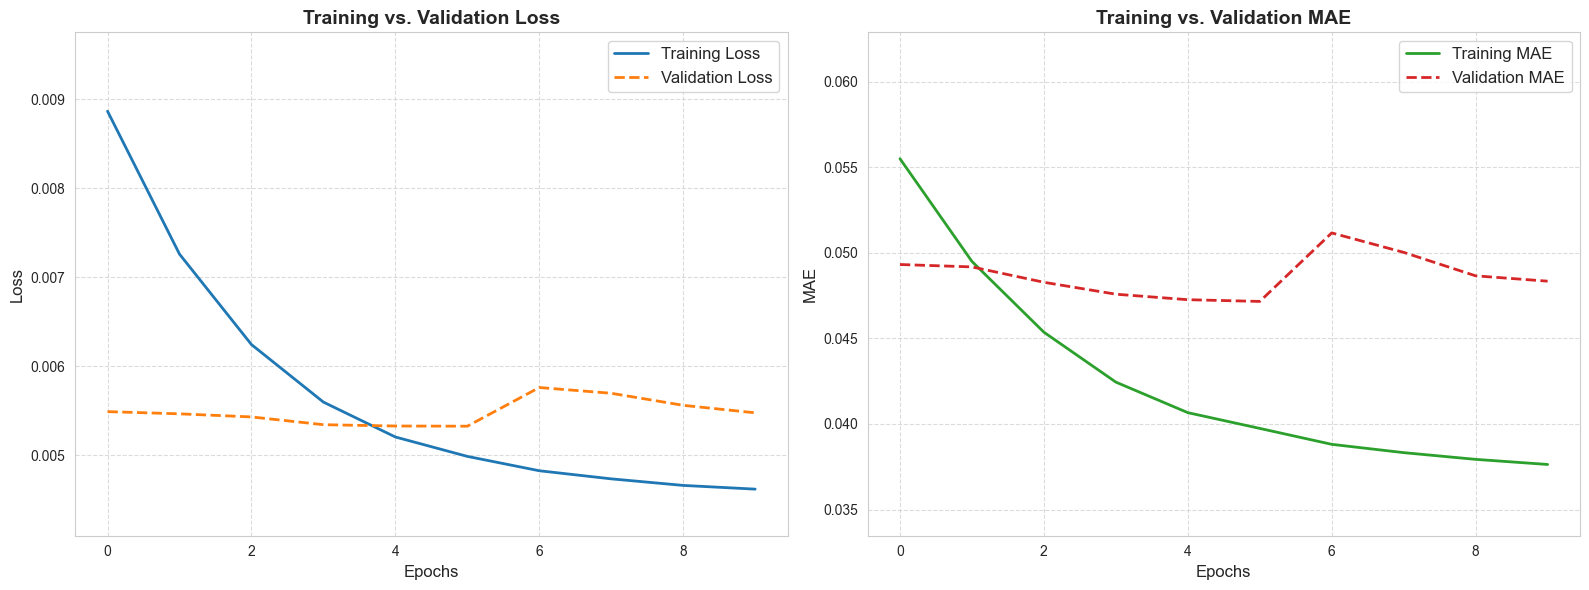

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply Seaborn theme for a more professional look
sns.set_style("whitegrid")

# Function to apply moving average smoothing
def smooth_curve(values, smoothing=0.6):
    smoothed_values = []
    prev = values[0]  # Start with the first value
    for v in values:
        smoothed_val = prev * smoothing + v * (1 - smoothing)
        smoothed_values.append(smoothed_val)
        prev = smoothed_val
    return smoothed_values

# Extract loss and MAE data from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']

# Smooth the curves for better visualization
train_loss_smooth = smooth_curve(train_loss, 0.6)
val_loss_smooth = smooth_curve(val_loss, 0.6)
train_mae_smooth = smooth_curve(train_mae, 0.6)
val_mae_smooth = smooth_curve(val_mae, 0.6)

# Create subplots for Loss and MAE
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Training & Validation Loss
axs[0].plot(train_loss_smooth, label='Training Loss', color='#1f77b4', linewidth=2)
axs[0].plot(val_loss_smooth, label='Validation Loss', color='#ff7f0e', linewidth=2, linestyle='dashed')
axs[0].set_title('Training vs. Validation Loss', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Epochs', fontsize=12)
axs[0].set_ylabel('Loss', fontsize=12)
axs[0].legend(fontsize=12, loc='upper right')
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].set_ylim(min(min(train_loss), min(val_loss)) * 0.9, max(max(train_loss), max(val_loss)) * 1.1)

# 📌 Plot 2: Training & Validation MAE
axs[1].plot(train_mae_smooth, label='Training MAE', color='#2ca02c', linewidth=2)
axs[1].plot(val_mae_smooth, label='Validation MAE', color='#d62728', linewidth=2, linestyle='dashed')
axs[1].set_title('Training vs. Validation MAE', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Epochs', fontsize=12)
axs[1].set_ylabel('MAE', fontsize=12)
axs[1].legend(fontsize=12, loc='upper right')
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].set_ylim(min(min(train_mae), min(val_mae)) * 0.9, max(max(train_mae), max(val_mae)) * 1.1)

# 📌 Improve layout
plt.tight_layout()
plt.show()


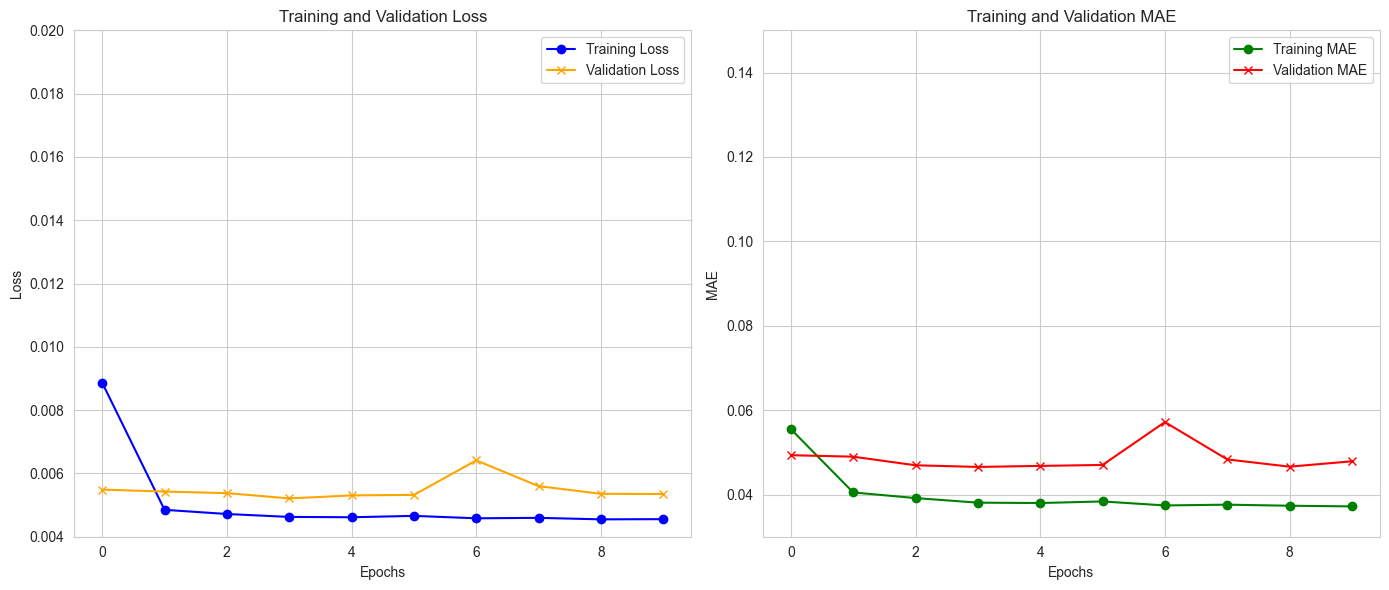

In [66]:
import matplotlib.pyplot as plt

# Create subplots for Loss and MAE
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot training & validation loss
axs[0].plot(history.history['loss'], label='Training Loss', color='blue', marker='o')
axs[0].plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='x')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)
axs[0].set_ylim(0.004, 0.020)  # Set y-axis range

# Plot training & validation MAE
axs[1].plot(history.history['mae'], label='Training MAE', color='green', marker='o')
axs[1].plot(history.history['val_mae'], label='Validation MAE', color='red', marker='x')
axs[1].set_title('Training and Validation MAE')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('MAE')
axs[1].legend()
axs[1].grid(True)
axs[1].set_ylim(0.03, 0.15)  # Set y-axis range

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [67]:
y_pred = model.predict(X_test)


316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [68]:
print(y_pred.shape)  # Should match y_test.shape (e.g., (10096, 1))


(10096, 1)


In [69]:
y_pred = y_pred.flatten()
y_pred.shape

(10096,)

## inverseing


In [70]:
# Ensure scaled_data is properly defined before using its shape
num_features = 3  # Update this based on your dataset

# Create a full array for inverse transformation
y_pred_full = np.zeros((y_pred.shape[0], num_features))  # Use the same number of features as original data
y_pred_full[:, 0] = y_pred.flatten()  # Insert predictions into the first column

# Apply inverse transformation
y_pred_inverse = scaler.inverse_transform(y_pred_full)[:, 0]  # Extract only the first column

# If y_test was also scaled, inverse transform it for comparison
y_test_full = np.zeros((y_test.shape[0], num_features))  # Use the same number of features
y_test_full[:, 0] = y_test.flatten()
y_test_inverse = scaler.inverse_transform(y_test_full)[:, 0]  # Extract only the first column


# R2 Score

In [71]:
from sklearn.metrics import r2_score

# Compute R² score
r2 = r2_score(y_test_inverse, y_pred_inverse)

# Print the R² score
print("R² Score:", r2)


R² Score: 0.9712549265440693


## plot pred and true

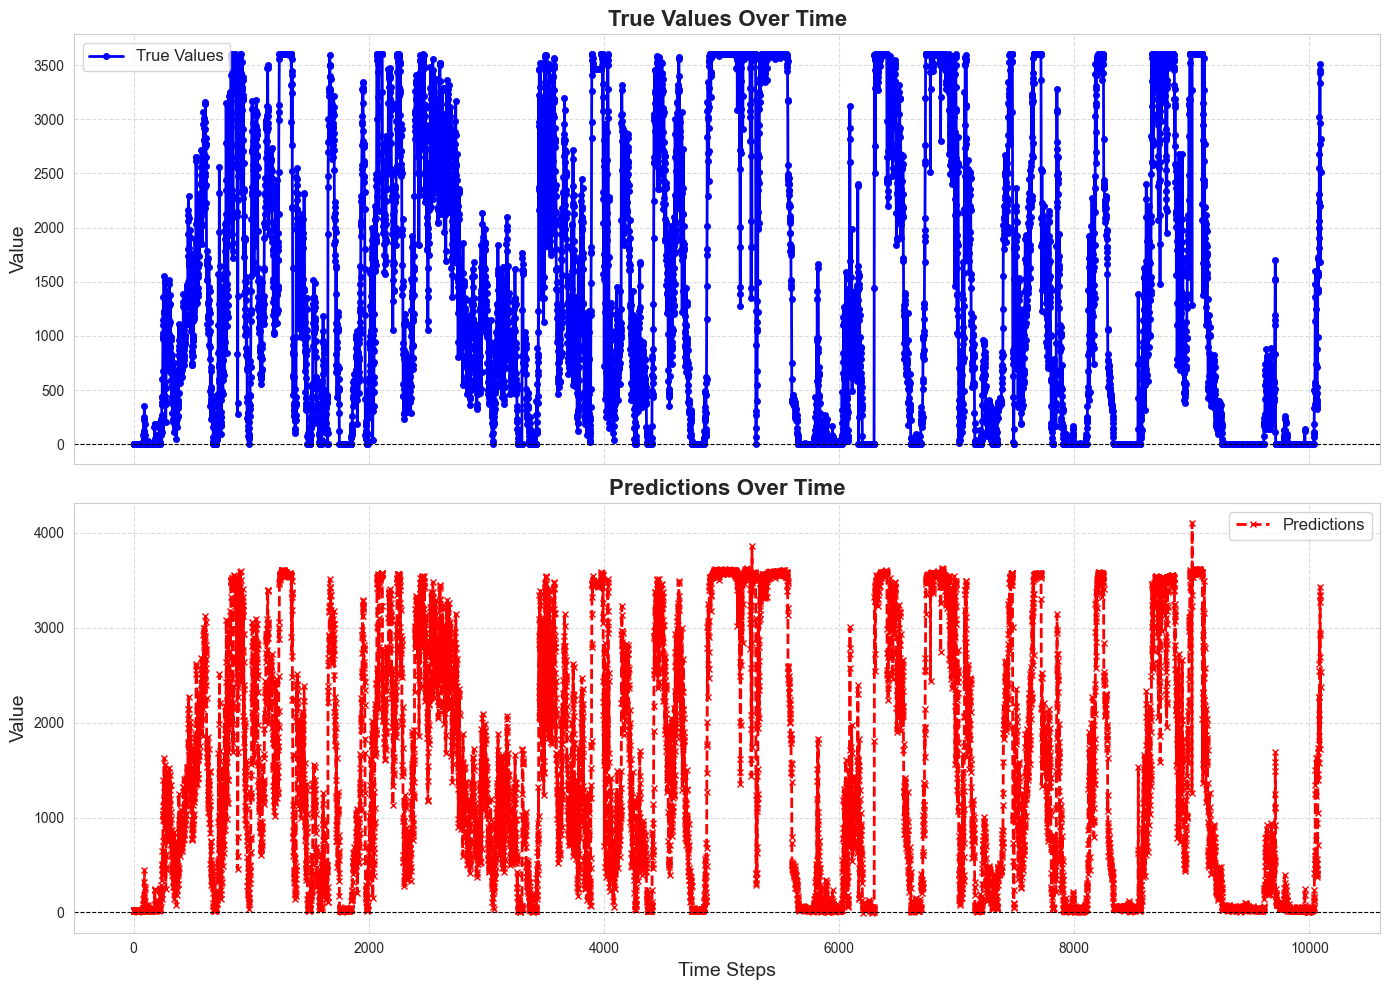

In [72]:
# Create a time array
time_steps = np.arange(len(y_test_inverse))

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot True Values
axs[0].plot(time_steps, y_test_inverse, label='True Values', color='blue', linestyle='-', linewidth=2, marker='o', markersize=4)
axs[0].set_title('True Values Over Time', fontsize=16, fontweight='bold')
axs[0].set_ylabel('Value', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].grid(visible=True, linestyle='--', alpha=0.7)

# Plot Predictions
axs[1].plot(time_steps, y_pred_inverse, label='Predictions', color='red', linestyle='--', linewidth=2, marker='x', markersize=4)
axs[1].set_title('Predictions Over Time', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Time Steps', fontsize=14)
axs[1].set_ylabel('Value', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].grid(visible=True, linestyle='--', alpha=0.7)

# Add a reference horizontal line at y=0
for ax in axs:
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Improve spacing
plt.tight_layout()
plt.show()

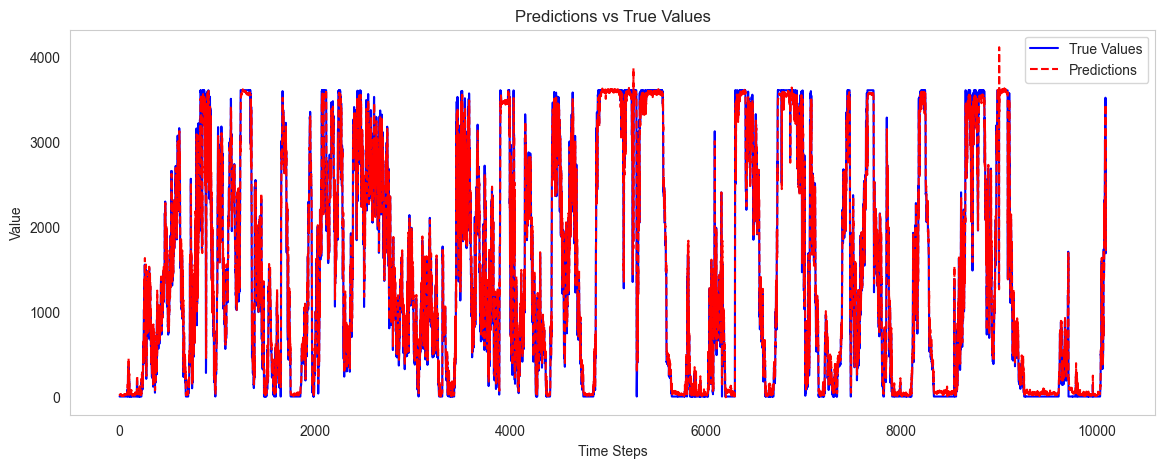

In [73]:
# Plot Predictions vs True Values
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(y_test_inverse, label='True Values', color='blue')
plt.plot(y_pred_inverse, label='Predictions', color='red', linestyle="dashed")
plt.title('Predictions vs True Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

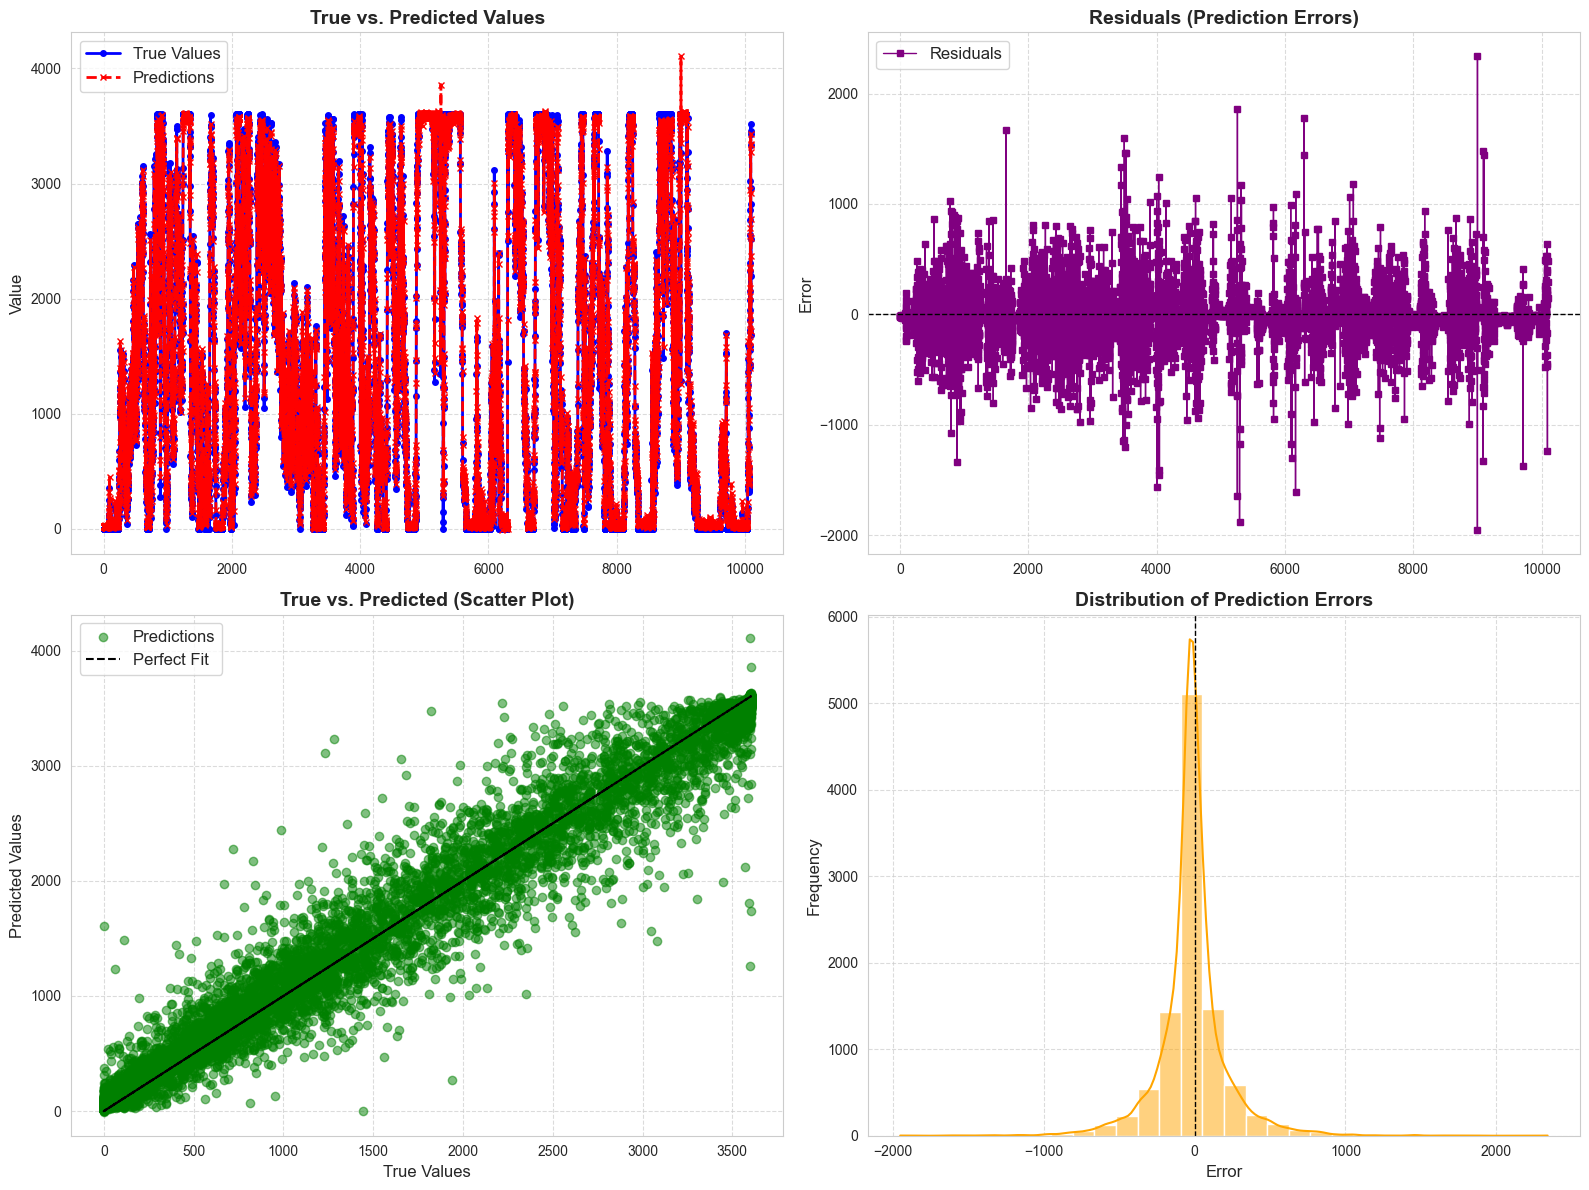

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# y_test_inverse = ...  # True values after inverse transformation
# y_pred_inverse = ...  # Predicted values after inverse transformation

time_steps = np.arange(len(y_test_inverse))  # Create a time array

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: True vs. Predicted Values (Line Plot)
axs[0, 0].plot(time_steps, y_test_inverse, label='True Values', color='blue', linestyle='-', linewidth=2, marker='o', markersize=4)
axs[0, 0].plot(time_steps, y_pred_inverse, label='Predictions', color='red', linestyle='--', linewidth=2, marker='x', markersize=4)
axs[0, 0].set_title('True vs. Predicted Values', fontsize=14, fontweight='bold')
axs[0, 0].set_ylabel('Value', fontsize=12)
axs[0, 0].legend(fontsize=12)
axs[0, 0].grid(visible=True, linestyle='--', alpha=0.7)

# Plot 2: Residual Plot (Errors)
residuals = y_test_inverse - y_pred_inverse
axs[0, 1].plot(time_steps, residuals, label='Residuals', color='purple', linestyle='-', linewidth=1, marker='s', markersize=4)
axs[0, 1].axhline(0, color='black', linewidth=1, linestyle='--')
axs[0, 1].set_title('Residuals (Prediction Errors)', fontsize=14, fontweight='bold')
axs[0, 1].set_ylabel('Error', fontsize=12)
axs[0, 1].legend(fontsize=12)
axs[0, 1].grid(visible=True, linestyle='--', alpha=0.7)

# Plot 3: Scatter Plot of True vs. Predicted Values
axs[1, 0].scatter(y_test_inverse, y_pred_inverse, color='green', alpha=0.5, label='Predictions')
axs[1, 0].plot(y_test_inverse, y_test_inverse, color='black', linestyle='--', label='Perfect Fit')  # Reference line
axs[1, 0].set_title('True vs. Predicted (Scatter Plot)', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('True Values', fontsize=12)
axs[1, 0].set_ylabel('Predicted Values', fontsize=12)
axs[1, 0].legend(fontsize=12)
axs[1, 0].grid(visible=True, linestyle='--', alpha=0.7)

# Plot 4: Histogram of Residuals
sns.histplot(residuals, bins=30, kde=True, color='orange', ax=axs[1, 1])
axs[1, 1].axvline(0, color='black', linewidth=1, linestyle='--')
axs[1, 1].set_title('Distribution of Prediction Errors', fontsize=14, fontweight='bold')
axs[1, 1].set_xlabel('Error', fontsize=12)
axs[1, 1].set_ylabel('Frequency', fontsize=12)
axs[1, 1].grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
